Polynomial Regression -> Linear models with basics

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_style('whitegrid')

y = X^3 +100 +c

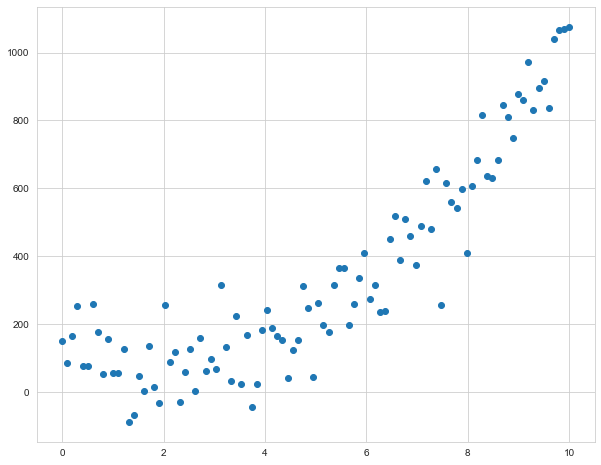

In [2]:
np.random.seed(42)
n_samples = 100

X = np.linspace(0, 10, 100)
rng = np.random.randn(n_samples) * 100

y = X ** 3 + 100 + rng
#remving the noise term (rng) we will get a clear curve for the given equation

plt.figure(figsize = (10, 8))
plt.scatter(X, y)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Linear Regression

0.7643394574930141


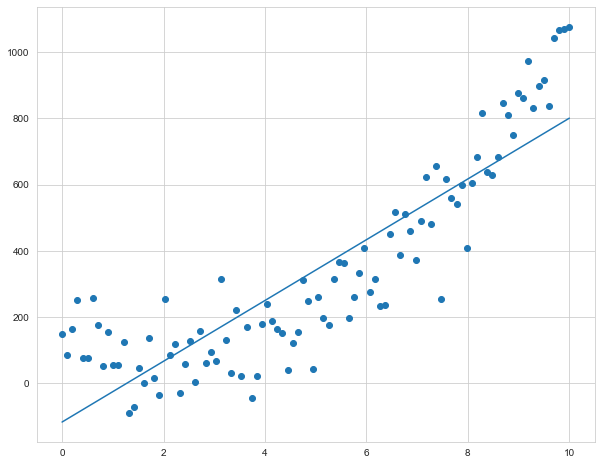

In [4]:
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
model_pred = lr.predict(X.reshape(-1, 1))

plt.figure(figsize = (10, 8))
plt.scatter(X, y)
plt.plot(X, model_pred)
print(r2_score(y, model_pred))

Polynomial

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))

In [7]:
#to understand how degree=2 and degre=3 work
arr = np.array([1, 2, 3, 4])
arr_2 = poly_reg.fit_transform(arr.reshape(-1, 1))
print(arr_2)

print("\n")

poly_reg_3 = PolynomialFeatures(degree=3)
arr_3 = poly_reg_3.fit_transform(arr.reshape(-1, 1))
print(arr_3)

[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]


[[ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]


In [8]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1, 1))
y_pred = lin_reg_2.predict(X_poly)

0.9173858308909386


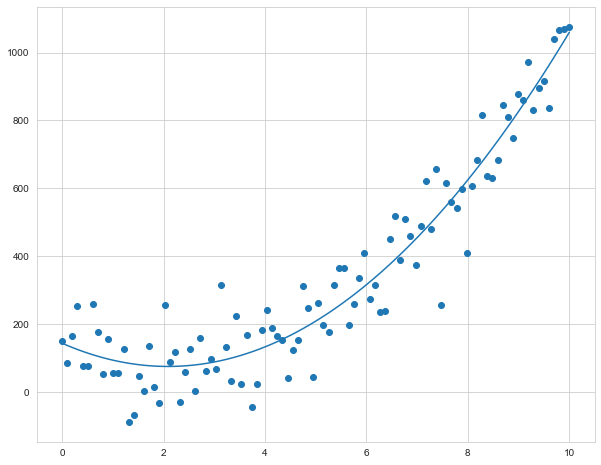

In [9]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y)
plt.plot(X, y_pred)
print(r2_score(y, y_pred))

Notice Polynomial curve fits better than the linear one

$Lets  Work  on  Actual  Data$

In [10]:
df_boston = pd.read_csv('data//housing.data', delim_whitespace=True, header=None)
df_boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
pd.options.display.float_format = "{:,.2f}".format
df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


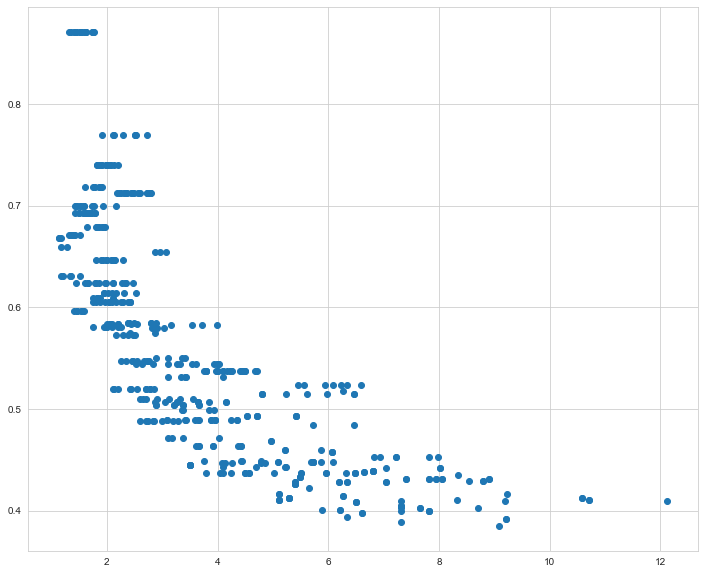

In [11]:
X_boston= df_boston['DIS'].values
y_boston = df_boston['NOX'].values
plt.figure(figsize=(12, 10))
plt.scatter(X_boston, y_boston)

Linear

R^2 score = 0.59


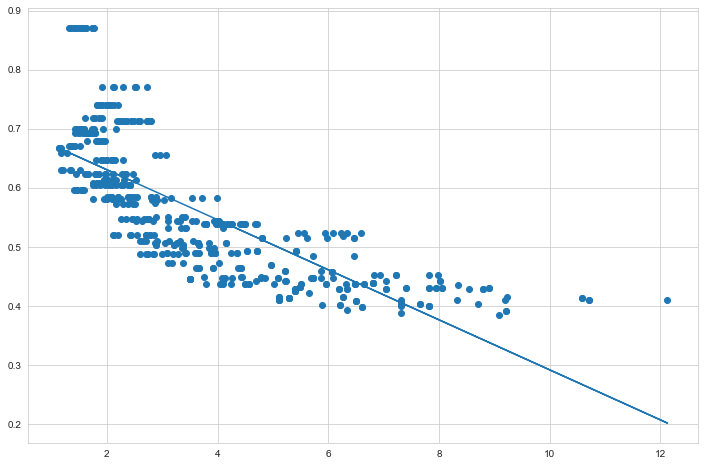

In [12]:
lr = LinearRegression()
lr.fit(X_boston.reshape(-1, 1), y_boston)
model_pred = lr.predict(X_boston.reshape(-1, 1))

plt.figure(figsize = (12, 8))
plt.scatter(X_boston.reshape(-1, 1), y_boston)
plt.plot(X_boston, model_pred)
print("R^2 score = {:.2f}".format(r2_score(y_boston, model_pred)))

Quadratic

In [13]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1))
lin_reg_2 = LinearRegression()

lin_reg_2.fit(X_poly_b, y_boston)

X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]

In [14]:
X_fit

array([[ 1.1296],
       [ 2.1296],
       [ 3.1296],
       [ 4.1296],
       [ 5.1296],
       [ 6.1296],
       [ 7.1296],
       [ 8.1296],
       [ 9.1296],
       [10.1296],
       [11.1296]])

R^2 score = 0.70


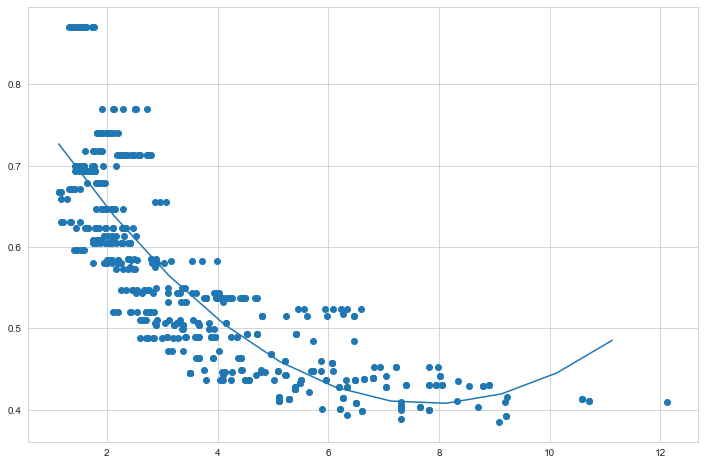

In [15]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_fit.reshape(-1, 1)))

plt.figure(figsize = (12, 8))
plt.scatter(X_boston, y_boston)
plt.plot(X_fit, y_pred)
print("R^2 score = {:.2f}".format(r2_score(y_boston, lin_reg_2.predict(X_poly_b))))

Notice that the quadratic modelworked better in the range 2 to 8 but failed for the other ranges. Thus we moveon to the next power

Cubic

R^2 score = 0.71


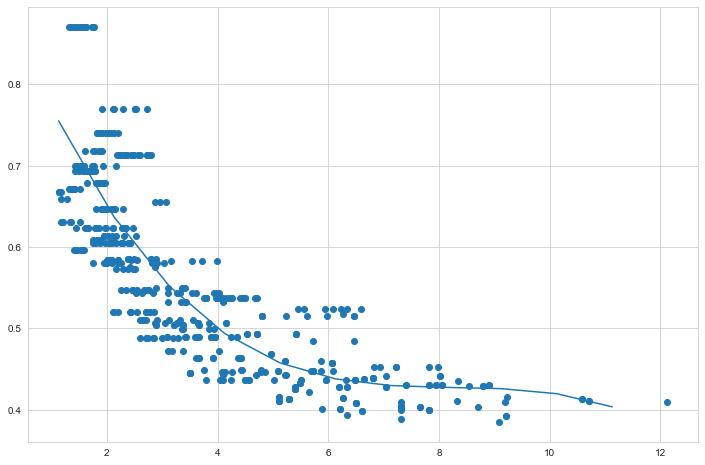

In [16]:
poly_reg_3 = PolynomialFeatures(degree = 3)
X_poly_b = poly_reg_3.fit_transform(X_boston.reshape(-1, 1))
lin_reg_3 = LinearRegression()

lin_reg_3.fit(X_poly_b, y_boston)

X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]

y_pred = lin_reg_3.predict(poly_reg_3.fit_transform(X_fit.reshape(-1, 1)))

plt.figure(figsize = (12, 8))
plt.scatter(X_boston, y_boston)
plt.plot(X_fit, y_pred)
print("R^2 score = {:.2f}".format(r2_score(y_boston, lin_reg_3.predict(X_poly_b))))

Notice cubic curve traces the data from 2 to 10 thus working better, although the r^2 has improved by a small amount